# CAPSTONE PROJECT 1: Prediction of Employee Attrition

In [184]:
#Import some useful modules for upcoming works.
import pandas as pd
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pylab as pl
%matplotlib inline
import scipy.stats as st
import numpy as np

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('/Users/emrahceyhan/Desktop/SpringBoardArchieve/CapstoneProject/Capstone1-HR-Employee-Attrition.csv')

In [185]:
#Explore the data
data.info()
data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [186]:
# get the number of missing data points per column
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Good News!! There is no missing values.

In [187]:
#Check the unique columns in the data to find which are categorical
nunique=data.nunique()
nunique= nunique.sort_values()
nunique

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [188]:
# Delete columns having the value of '1 or any same values for all observation'. 
cols = ["Over18", "StandardHours", "EmployeeCount", "EmployeeNumber"]
for i in cols:
    del data[i]

In [189]:
#Create a new data set called 'df_yes' by filtering the data set 'df' where Attrition='Yes'
# See the trends of employees in attrition or features of employees who left the job.
df_yes=data[data.Attrition == 'Yes']
df_yes.shape

(237, 31)

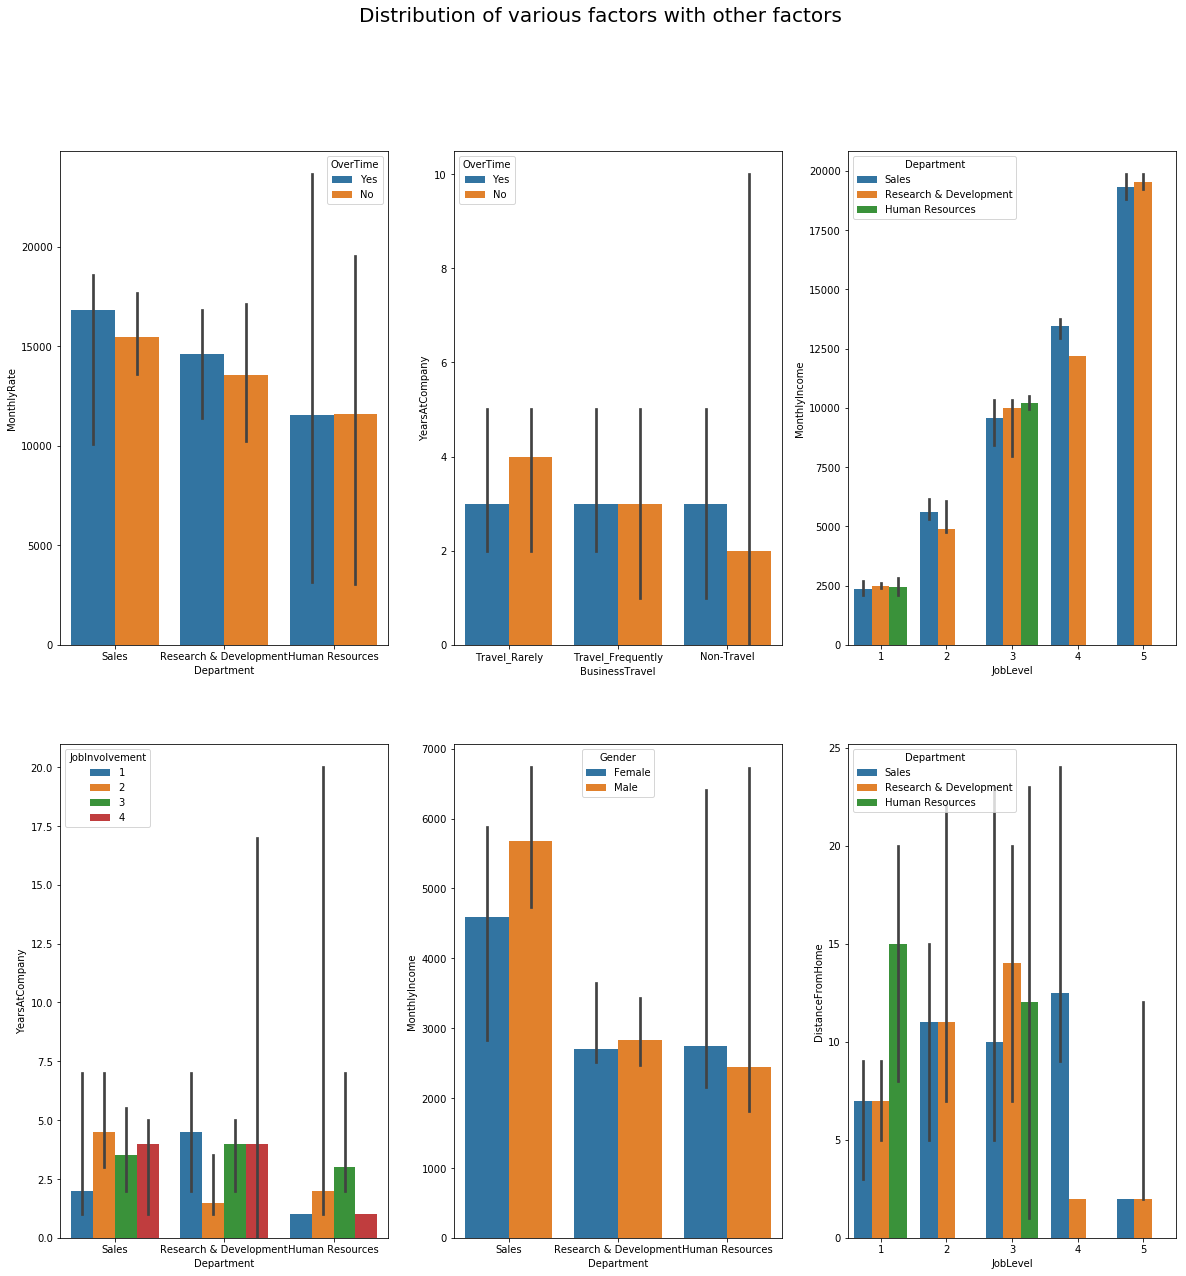

In [190]:
#The goal is to identify some features that link to where Attrition='Yes'
from numpy import median
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors with other factors", fontsize=20)
sns.barplot(df_yes['Department'],df_yes['MonthlyRate'],hue = df_yes['OverTime'], estimator=median, ax = ax[0,0]); 
sns.barplot(df_yes['BusinessTravel'],df_yes['YearsAtCompany'],hue = df_yes['OverTime'], estimator=median, ax = ax[0,1]); 
sns.barplot(df_yes['JobLevel'],df_yes['MonthlyIncome'],hue = df_yes['Department'], estimator=median, ax = ax[0,2]); 
sns.barplot(df_yes['Department'],df_yes['YearsAtCompany'],hue = df_yes['JobInvolvement'],estimator=median, ax = ax[1,0]); 
sns.barplot(df_yes['Department'],df_yes['MonthlyIncome'],hue = df_yes['Gender'], estimator=median, ax = ax[1,1]); 
sns.barplot(df_yes['JobLevel'],df_yes['DistanceFromHome'],hue = df_yes['Department'], estimator=median, ax = ax[1,2]);


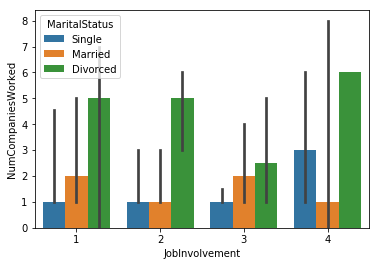

In [191]:
sns.barplot(df_yes['JobInvolvement'],df_yes['NumCompaniesWorked'],hue = df_yes['MaritalStatus'], estimator=median);

#Histograms bar plots from left to right

#1.Employees who had overtime from Sales department having around 6000 monthly income are more likely to leave than other departments

#2.Employees who had no overtime with TravelRarely having around 4 years of working are more likely to leave than employees with travel or no travel status.

#3.Employees who had JobLevel 5 from Research & Development Department having around 20000 monthly income are more likely to leave than employees from Sales department having similar categories.

#4.Low job involvements from Sales and Research & Development department are more likely to leave.

#5.Males having around 5500 monthly income from Sales department are more likely to leave than females having 4500 montly income in the same department.

#6.Job Level 1 in Human Resources having 15 distance from home are more likely to leave. Distance From Home in high job levels can be an issue for people from Sales Department.

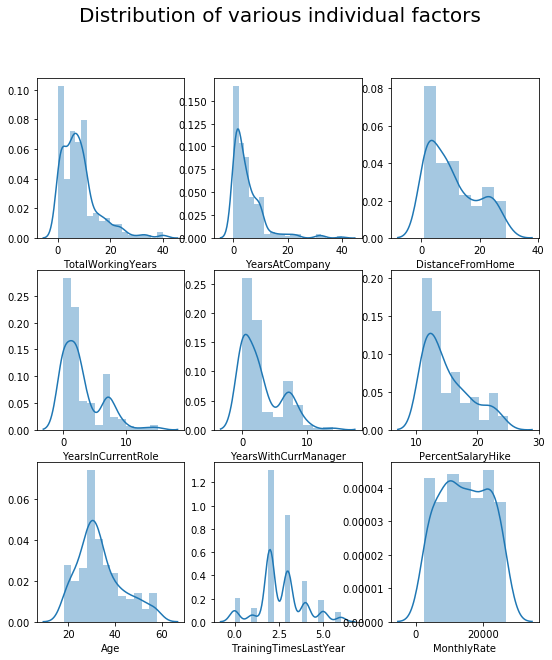

In [192]:
#Explore some trends for employees who left
fig,ax = plt.subplots(3,3, figsize=(9,10)) 
# 'ax' has references to all the four axes
plt.suptitle("Distribution of various individual factors", fontsize=20)
sns.distplot(df_yes['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df_yes['YearsAtCompany'], ax = ax[0,1]) 
sns.distplot(df_yes['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(df_yes['YearsInCurrentRole'], ax = ax[1,0]) 
sns.distplot(df_yes['YearsWithCurrManager'], ax = ax[1,1])  
sns.distplot(df_yes['PercentSalaryHike'], ax = ax[1,2])   
sns.distplot(df_yes['Age'], ax=ax[2,0])
sns.distplot(df_yes['TrainingTimesLastYear'], ax=ax[2,1])
sns.distplot(df_yes['MonthlyRate'], ax=ax[2,2])
plt.show()

All plots displayed above related to fetures of employees who left the job.
- Number of employees in attrition decreased after 20 years of TotalWorkingYears and YearsAtCompany. 
- Most of employees who left were had 20 miles or less distance from home to work.
- PercentSalaryHike mostly changes between 10 and 20 percent for employees who left.
- Number of employees who turned over decrease after age between 30 and 40.
- Most of employees turned over did 2 and 3 times of training last year.
- Employees in attrition are likely to be also from high monthly rate positions displayed on the last plot. 


# Change in MonthlyRate by Gender 

1.04641557699


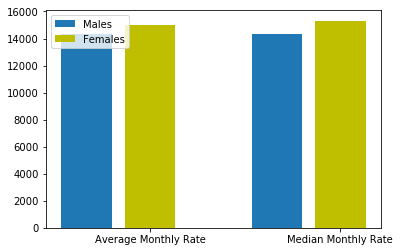

In [193]:
avg_male_rate = np.mean(df_yes.MonthlyRate[data.Gender == 'Male']) 
avg_female_rate = np.mean(df_yes.MonthlyRate[data.Gender == 'Female'])

med_male_rate = np.median(df_yes.MonthlyRate[data.Gender == 'Male']) 
med_female_rate = np.median(df_yes.MonthlyRate[data.Gender == 'Female'])

plt.bar([1,4],[avg_male_rate, med_male_rate]) 
plt.bar([2,5],[avg_female_rate, med_female_rate], color = 'y') 
plt.xticks([2,5],['Average Monthly Rate','Median Monthly Rate']) 
plt.legend(['Males','Females'], loc = 2)

print(avg_female_rate/avg_male_rate) 


Average Monthly Rate for females %4 higher than Males. We know that attrition in males is higher than females, so monthly rate can be an influencial factor for that reason.

In [194]:
#Encode categorical or binary features as numerics.
from sklearn.preprocessing import LabelEncoder as LE

data['Attrition'] = LE().fit_transform(data['Attrition'])
data['Department'] = LE().fit_transform(data['Department'])
data['EducationField'] = LE().fit_transform(data['EducationField'])
data['Gender'] = LE().fit_transform(data['Gender'])
data['JobRole'] = LE().fit_transform(data['JobRole'])
data['MaritalStatus'] = LE().fit_transform(data['MaritalStatus'])
data['OverTime'] = LE().fit_transform(data['OverTime'])
data['BusinessTravel'] = LE().fit_transform(data['BusinessTravel'])
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7


# Applying two sample t-test for numerical values

In [195]:
import scipy.stats as stats
#Apply two sample t-test to compare age between 2 groups (attrition or no attrition)
yes_age = data[data.Attrition== 1].Age
no_age = data[data.Attrition== 0].Age
two_sample=stats.ttest_ind(yes_age, no_age)
print('The results of the two sample t-test in age are: \n\tt-value = {:4.3f}\n\tp-value = {:4.5f}'.format(two_sample[0],two_sample[1]))
#Apply two sample t-test to compare DailyRate between 2 groups (attrition or no attrition)
yes_DailyRate = data[data.Attrition== 1].DailyRate
no_DailyRate = data[data.Attrition== 0].DailyRate
two_sample=stats.ttest_ind(yes_DailyRate, no_DailyRate)
print('The results of the two sample t-test in DailyRate are: \n\tt-value = {:4.3f}\n\tp-value = {:4.5f}'.format(two_sample[0],two_sample[1]))
#Apply two sample t-test to compare HourlyRate between 2 groups (attrition or no attrition)
yes_HourlyRate = data[data.Attrition== 1].HourlyRate
no_HourlyRate = data[data.Attrition== 0].HourlyRate
two_sample=stats.ttest_ind(yes_HourlyRate, no_HourlyRate)
print('The results of the two sample t-test in HourlyRate are: \n\tt-value = {:4.3f}\n\tp-value = {:4.5f}'.format(two_sample[0],two_sample[1]))
#Apply two sample t-test to compare MonthlyRate between 2 groups (attrition or no attrition)
yes_MonthlyRate = data[data.Attrition== 1].MonthlyRate
no_MonthlyRate = data[data.Attrition== 0].MonthlyRate
two_sample=stats.ttest_ind(yes_MonthlyRate, no_MonthlyRate)
print('The results of the two sample t-test in MonthlyRate are: \n\tt-value = {:4.3f}\n\tp-value = {:4.5f}'.format(two_sample[0],two_sample[1]))
#Apply two sample t-test to compare DistanceFromHome between 2 groups (attrition or no attrition)
yes_DistanceFromHome = data[data.Attrition== 1].DistanceFromHome
no_DistanceFromHome = data[data.Attrition== 0].DistanceFromHome
two_sample=stats.ttest_ind(yes_DistanceFromHome, no_DistanceFromHome)
print('The results of the two sample t-test in DistanceFromHome are: \n\tt-value = {:4.3f}\n\tp-value = {:4.5f}'.format(two_sample[0],two_sample[1]))
#Apply two sample t-test to compare PercentSalaryHike between 2 groups (attrition or no attrition)
yes_PercentSalaryHike = data[data.Attrition== 1].PercentSalaryHike
no_PercentSalaryHike = data[data.Attrition== 0].PercentSalaryHike
two_sample=stats.ttest_ind(yes_PercentSalaryHike, no_PercentSalaryHike)
print('The results of the two sample t-test in PercentSalaryHike are: \n\tt-value = {:4.3f}\n\tp-value = {:4.5f}'.format(two_sample[0],two_sample[1]))
#Apply two sample t-test to compare YearsAtCompany between 2 groups (attrition or no attrition)
yes_YearsAtCompany = data[data.Attrition== 1].YearsAtCompany
no_YearsAtCompany = data[data.Attrition== 0].YearsAtCompany
two_sample=stats.ttest_ind(yes_YearsAtCompany, no_YearsAtCompany)
print('The results of the two sample t-test in YearsAtCompany are: \n\tt-value = {:4.3f}\n\tp-value = {:4.5f}'.format(two_sample[0],two_sample[1]))
#Apply two sample t-test to compare TotalWorkingYears between 2 groups (attrition or no attrition)
yes_TotalWorkingYears = data[data.Attrition== 1].TotalWorkingYears
no_TotalWorkingYears= data[data.Attrition== 0].TotalWorkingYears
two_sample=stats.ttest_ind(yes_TotalWorkingYears, no_TotalWorkingYears)
print('The results of the two sample t-test in TotalWorkinYears are: \n\tt-value = {:4.3f}\n\tp-value = {:4.5f}'.format(two_sample[0],two_sample[1]))
#Apply two sample t-test to compare YearsWithCurrManager between 2 groups (attrition or no attrition)
yes_YearsWithCurrManager = data[data.Attrition== 1].YearsWithCurrManager
no_YearsWithCurrManager = data[data.Attrition== 0].YearsWithCurrManager
two_sample=stats.ttest_ind(yes_YearsWithCurrManager, no_YearsWithCurrManager)
print('The results of the two sample t-test in YearsWithCurrManager are: \n\tt-value = {:4.3f}\n\tp-value = {:4.5f}'.format(two_sample[0],two_sample[1]))
#Apply two sample t-test to compare YearsInCurrentRole between 2 groups (attrition or no attrition)
yes_YearsInCurrentRole = data[data.Attrition== 1].YearsInCurrentRole
no_YearsInCurrentRole = data[data.Attrition== 0].YearsInCurrentRole
two_sample=stats.ttest_ind(yes_YearsInCurrentRole, no_YearsInCurrentRole)
print('The results of the two sample t-test in YearsInCurrentRole are: \n\tt-value = {:4.3f}\n\tp-value = {:4.5f}'.format(two_sample[0],two_sample[1]))

The results of the two sample t-test in age are: 
	t-value = -6.179
	p-value = 0.00000
The results of the two sample t-test in DailyRate are: 
	t-value = -2.174
	p-value = 0.02986
The results of the two sample t-test in HourlyRate are: 
	t-value = -0.262
	p-value = 0.79313
The results of the two sample t-test in MonthlyRate are: 
	t-value = 0.581
	p-value = 0.56112
The results of the two sample t-test in DistanceFromHome are: 
	t-value = 2.995
	p-value = 0.00279
The results of the two sample t-test in PercentSalaryHike are: 
	t-value = -0.516
	p-value = 0.60561
The results of the two sample t-test in YearsAtCompany are: 
	t-value = -5.196
	p-value = 0.00000
The results of the two sample t-test in TotalWorkinYears are: 
	t-value = -6.652
	p-value = 0.00000
The results of the two sample t-test in YearsWithCurrManager are: 
	t-value = -6.059
	p-value = 0.00000
The results of the two sample t-test in YearsInCurrentRole are: 
	t-value = -6.232
	p-value = 0.00000


According to the p values of t-test calculated above, we rejected the null hyphothesis and there are statistical significant between characteristics of employees lost in attrition compared to those who stay in IBM's fictional dataset. These numerical characteristics are: Age, DailyRate, DistanceFromHome, YearsAtCompany, TotalWorkingYears, YearsWithCurrManager, YearsInCurrentRole (p=value < .05).However, PercentSalaryHike and HourlyRate have p-values larger than .05, so we fail to reject the null and these features are not identical for both group of employees who left or stayed. 

# Correlation of Features

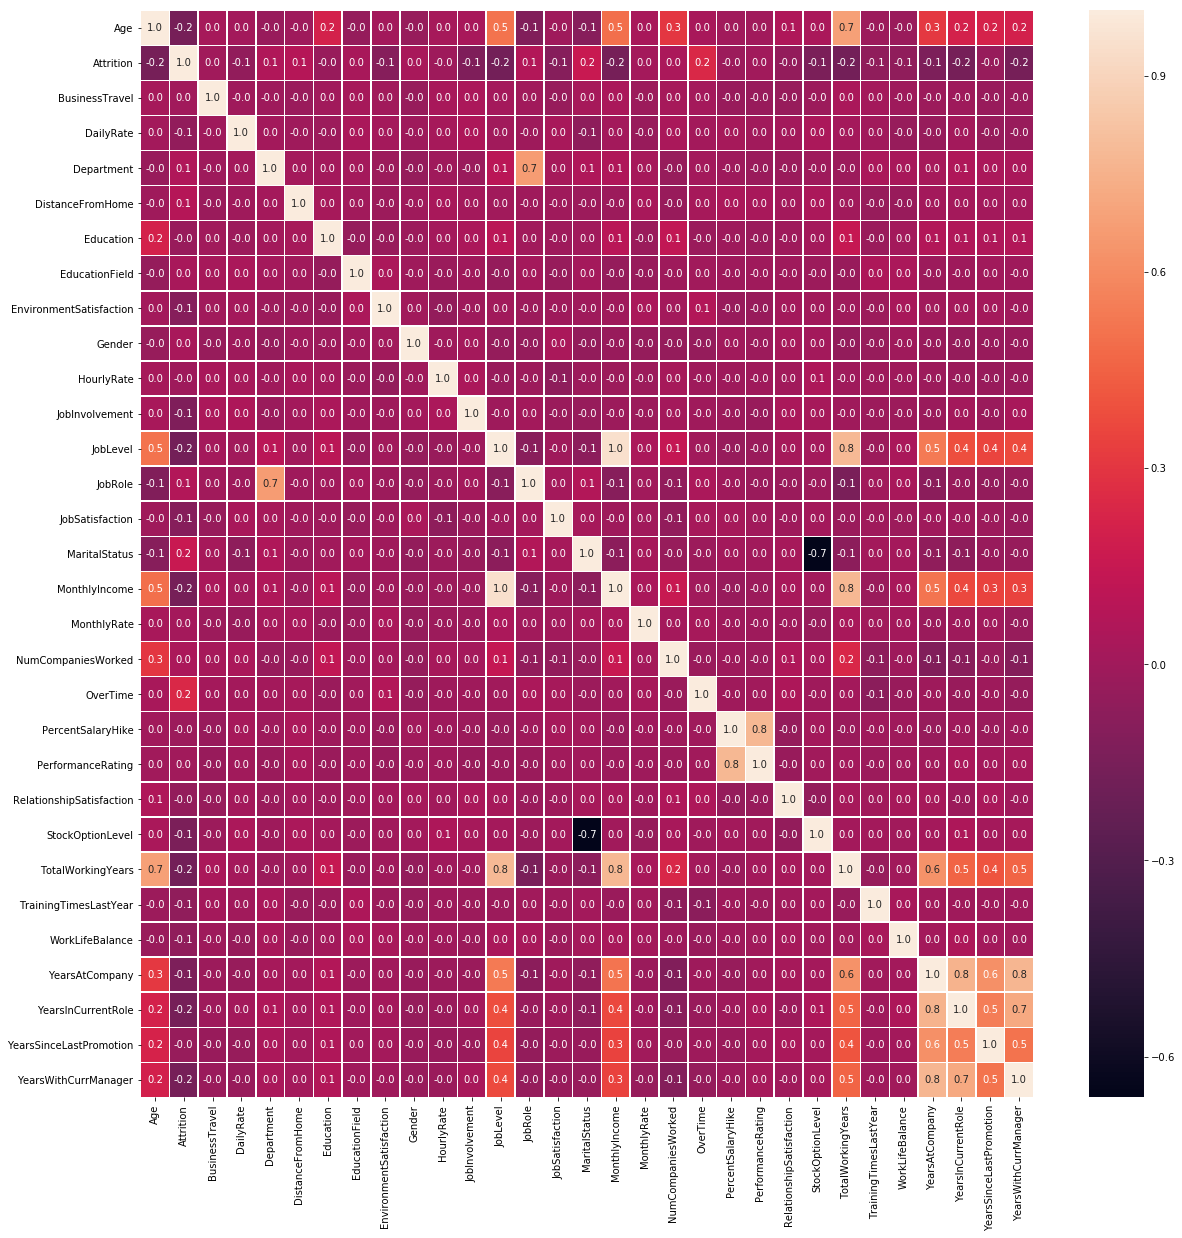

In [196]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

- Age highly correlated with TotalWorkingYears(=0.7)

- JobLevel highly correlated with TotalWorkingYears(=0.7)

- JobLevel highly correlated with MonthlyIncome(=1.0)

- MonthlyIncome highly correlated with TotalWorkingYears(=0.8)

- PercentSalaryHike highly correlated with PerformanceRating(=0.8)

- YearsAtCompany highly correlated with YearsInCurrentRole and YearsWithCurrManager (=0.8)

- YearsAtCompany highly correlated with YearsSinceLastPromotion(=0.8)

- YearsCurrentRole highly correlated with YearsWithCurrManager(=0.7)
- Since the multicollinerity is not a big issue in logistic regression, these highly correlated variables can stay in the data. 

# Imbalanced data Challenge 

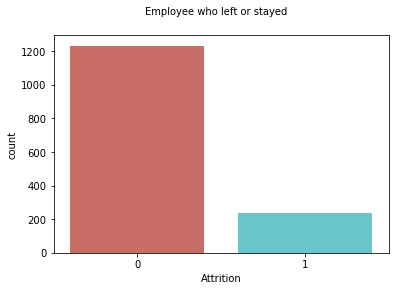

In [221]:
#See the countplot for number of employees who left or stay.

plt.suptitle("Employee who left or stayed", fontsize=10)
sns.countplot(x='Attrition', data=data, palette='hls')
plt.show()


In [222]:
# Count the number of attrition or number of no attrition
print("Total records: ", len(data))
print("Records for employees left,'Yes',: ", sum(data.Attrition == 1))
print("Records for employees stayed,'No',: ", sum(data.Attrition == 0))

('Total records: ', 1470)
("Records for employees left,'Yes',: ", 237)
("Records for employees stayed,'No',: ", 1233)


As seen from the count plot above, there is a big gap between '0' and '1' values of binary response, 'Attrition'. Thus, an up sample for minority class, '1' in our data, will be apply in order to reinforce its signal. Then, a new data frame consisting of up-sampled minority class will be created.

In [223]:
#Fit a very simple logistic model using default settings for everything
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate input features (X) and target variable (y)
y = data.Attrition
X = data.drop('Attrition', axis=1)
 
# Train model
clf_0 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_0 = clf_0.predict(X)

# How's the accuracy?
print( accuracy_score(pred_y_0, y) )

0.867346938776


As seen above, machine learning algorithm is predicting majority of class.

In [224]:
from sklearn.utils import resample #import the resampling module from Scikit-Learn
# Separate majority and minority classes
df_majority = data[data.Attrition==0]
df_minority = data[data.Attrition==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1233,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Attrition.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

As seen from above, the ratio of two classes are now equal to 1.

In [225]:
#Let's train another model using Logistic Regression, this time on the balanced dataset:
# Separate input features (X) and target variable (y)
y = df_upsampled.Attrition
X = df_upsampled.drop('Attrition', axis=1)

# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_1) )

[0 1]
0.767234387672


Accuracy seems more meaningful now.

In [226]:
df_upsampled.info() # Now, we have 31 columns recoded as numerical data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 1 to 1153
Data columns (total 31 columns):
Age                         2466 non-null int64
Attrition                   2466 non-null int64
BusinessTravel              2466 non-null int64
DailyRate                   2466 non-null int64
Department                  2466 non-null int64
DistanceFromHome            2466 non-null int64
Education                   2466 non-null int64
EducationField              2466 non-null int64
EnvironmentSatisfaction     2466 non-null int64
Gender                      2466 non-null int64
HourlyRate                  2466 non-null int64
JobInvolvement              2466 non-null int64
JobLevel                    2466 non-null int64
JobRole                     2466 non-null int64
JobSatisfaction             2466 non-null int64
MaritalStatus               2466 non-null int64
MonthlyIncome               2466 non-null int64
MonthlyRate                 2466 non-null int64
NumCompaniesWorked          2

# Logistic Regression Model

In [227]:
import statsmodels.api as sm
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.498103
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 2466
Model:                          Logit   Df Residuals:                     2436
Method:                           MLE   Df Model:                           29
Date:                Sat, 30 Jun 2018   Pseudo R-squ.:                  0.2814
Time:                        00:48:12   Log-Likelihood:                -1228.3
converged:                       True   LL-Null:                       -1709.3
                                        LLR p-value:                9.360e-184
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0182      0.007     -2.522      0.012      -0.032

- The odds for BusinessTravel, Department,DistanceFromHome, EducationField, Gender, MaritalStatus, NumCompaniesWorked, PerformanceRating, YearsAtCompany, YearsSinceLastPromotion displayed above mean that they are positively associated with employee attrition in this data set.
- However, for example, as age increases, it is more likely having no attrition. Also, employees who have high EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, MonthlyIncome, PercentSalaryHike, RelationshipSatisfaction, TotalWorkingYears, TrainingTimesLastYear, YearsInCurrentRole, YearsWithCurrManager are more likely to leave the job.
- When comparing the p values larger than .05, DailyRate, Education, HourlyRate, JobLevel, MonthlyRate, StockOptionLevel and WorkLifeBalance are not statistically significant for this model prediction.


In [228]:
print result.conf_int() #The confidence interval gives you an idea for how robust the coefficients of the model are.

                                 0         1
Age                      -0.032262 -0.004047
BusinessTravel            0.069528  0.387443
DailyRate                -0.000456  0.000030
Department                0.527685  1.084679
DistanceFromHome          0.024222  0.048440
Education                -0.020667  0.170931
EducationField            0.041580  0.185319
EnvironmentSatisfaction  -0.443107 -0.265720
Gender                    0.072301  0.478490
HourlyRate               -0.001938  0.007562
JobInvolvement           -0.573921 -0.300263
JobLevel                 -0.184237  0.456414
JobRole                  -0.148255 -0.032255
JobSatisfaction          -0.370765 -0.192470
MaritalStatus             0.397476  0.754656
MonthlyIncome            -0.000190 -0.000034
MonthlyRate              -0.000004  0.000024
NumCompaniesWorked        0.122970  0.208427
OverTime                  1.454635  1.879819
PercentSalaryHike        -0.114472 -0.032577
PerformanceRating         0.519819  1.192344
Relationsh

In [229]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                              2.5%     97.5%        OR
Age                       0.968253  0.995962  0.982010
BusinessTravel            1.072002  1.473209  1.256695
DailyRate                 0.999544  1.000030  0.999787
Department                1.695003  2.958491  2.239342
DistanceFromHome          1.024518  1.049632  1.036999
Education                 0.979545  1.186409  1.078027
EducationField            1.042457  1.203602  1.120135
EnvironmentSatisfaction   0.642038  0.766653  0.701585
Gender                    1.074979  1.613637  1.317052
HourlyRate                0.998064  1.007590  1.002816
JobInvolvement            0.563312  0.740624  0.645912
JobLevel                  0.831739  1.578404  1.145784
JobRole                   0.862211  0.968260  0.913698
JobSatisfaction           0.690206  0.824919  0.754562
MaritalStatus             1.488064  2.126879  1.779026
MonthlyIncome             0.999810  0.999966  0.999888
MonthlyRate               0.999996  1.000024  1.000010
NumCompani

Variables having OR(odd ratio) > 1 give (OR - 1)% increase in the odds at any value of X. For example,when Attrition=1 occurs, OverTime makes nearly 4% increase. Variable having OR(Odd ratio) < 1 means that they have inverse relationship with Attrition.  

In [230]:
#Split the data set as train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [231]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [233]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.752


The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well.

In [234]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [235]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[319  96]
 [ 85 314]]


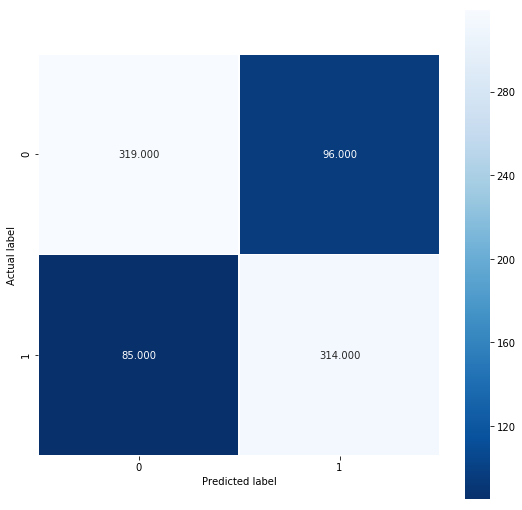

In [236]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


Precision= 314/(314+96)=0.77, Recall= 314/(314+85)=0.78

In [237]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.77      0.78       415
          1       0.77      0.79      0.78       399

avg / total       0.78      0.78      0.78       814



# ROC Curve

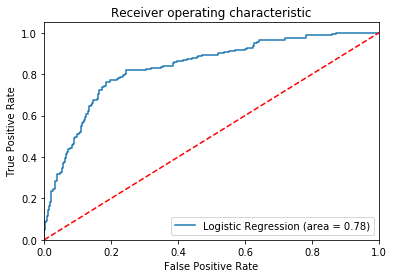

In [238]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The AUC(Area under Curve) is 0.78. AUC is the probability that if you were to take a random pair of observations, one with Y=1(having attrition) and one with Y=0 (no  attrition), the observation with Y=1 has a higher predicted probability than the other. The AUC thus gives the probability that this logistic regression model correctly ranks such pairs of observations.

# Random Forest Classification (RFC)

In [249]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [250]:
#Calculate Accuracy Score for Random Forest
from sklearn.metrics import accuracy_score
predicted = model.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(accuracy)

0.963144963145


In [251]:
#Classification Report for Random Forest
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))


             precision    recall  f1-score   support

          0       0.96      0.96      0.96       415
          1       0.96      0.96      0.96       399

avg / total       0.96      0.96      0.96       814



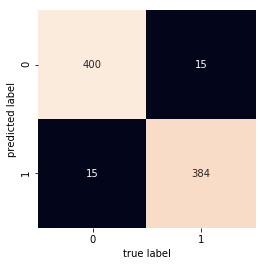

In [252]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Recall= 384/(384+15)=0.96, Precision=384/(384+15)=0.96 

# Determining feature importance

Features sorted by their score:
[(0.0906, 'NumCompaniesWorked'), (0.0716, 'MaritalStatus'), (0.0699, 'Age'), (0.0586, 'BusinessTravel'), (0.0534, 'YearsSinceLastPromotion'), (0.0507, 'Gender'), (0.0462, 'JobInvolvement'), (0.042, 'WorkLifeBalance'), (0.0399, 'RelationshipSatisfaction'), (0.0391, 'JobLevel'), (0.0379, 'MonthlyIncome'), (0.0357, 'Department'), (0.0345, 'StockOptionLevel'), (0.0286, 'TotalWorkingYears'), (0.0283, 'OverTime'), (0.0262, 'MonthlyRate'), (0.026, 'HourlyRate'), (0.0253, 'YearsAtCompany'), (0.0236, 'JobRole'), (0.0221, 'PerformanceRating'), (0.0205, 'DailyRate'), (0.0203, 'EducationField'), (0.0187, 'TrainingTimesLastYear'), (0.0185, 'DistanceFromHome'), (0.0174, 'Education'), (0.017, 'YearsInCurrentRole'), (0.0154, 'JobSatisfaction'), (0.0121, 'Attrition'), (0.0072, 'EnvironmentSatisfaction'), (0.0027, 'PercentSalaryHike')]
Feature ranking:
1. feature 18 (0.084364)
2. feature 15 (0.043140)
3. feature 11 (0.040945)
4. feature 0 (0.040827)
5. feature 23 (0.03899

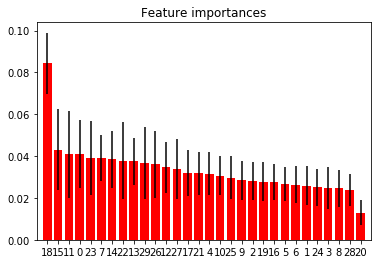

In [253]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
names =df_upsampled.columns.values

rf = RandomForestRegressor()
rf.fit(X, y)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             
             reverse=True)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=200,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
for f in range(X.shape[1]):
    indices = np.argsort(importances)[::-1]
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Top tree important features for positive true prediction are 'NumCompaniesWorked', 'JobInvolvement' and 'MaritalStatus'. The least important is 'PercentSalaryHike' and this information is consistent with our two-sample t-test applied before ruuning the models. When we compare these variables with the coefficients of logistic regression, they draw consistent results. 

# Support Vector Machines: Maximizing the Margin

In [244]:
from sklearn.svm import SVC
svc= SVC()
model = SVC(random_state=42).fit(X_train, y_train)
prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
print(score)

0.896805896806


Accuracy score for SVC is pretty high, about 90%.

In [245]:
#Fit the supported vector SVC ~ Support Vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

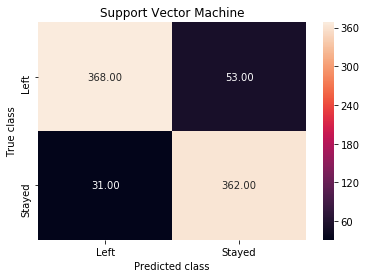

In [246]:
#Confusion Matrix for SVC
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

In [247]:
#Classification report for SVC model
print(metrics.classification_report(y_test, svc_y_pred))


             precision    recall  f1-score   support

          0       0.92      0.87      0.90       415
          1       0.87      0.92      0.90       399

avg / total       0.90      0.90      0.90       814



SVC has pretty high precision and recall too, 368/(368 +53)=0.87. Recall=368/(368+31)=0.92